In [1]:
import pandas as pd

df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data",header = None)

df.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


Rename columns using information from the database site source:
1. sepal length in cm 
2. sepal width in cm 
3. petal length in cm 
4. petal width in cm 
5. class: 

In [2]:
df.columns = ['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width', 'Class']

In [12]:
df.describe(include='all') #include=all gives unique/top/freq stats as well

,Sepal Length,Sepal Width,Petal Length,Petal Width,Class
count,150.000000,150.000000,150.000000,150.000000,150
unique,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,Iris-versicolor
freq,NaN,NaN,NaN,NaN,50
mean,5.843333,3.054000,3.758667,1.198667,NaN
std,0.828066,0.433594,1.764420,0.763161,NaN
min,4.300000,2.000000,1.000000,0.100000,NaN
25%,5.100000,2.800000,1.600000,0.300000,NaN
50%,5.800000,3.000000,4.350000,1.300000,NaN
75%,6.400000,3.300000,5.100000,1.800000,NaN


In [5]:
df.dtypes

Sepal Length    float64
Sepal Width     float64
Petal Length    float64
Petal Width     float64
Class            object
dtype: object

In [6]:
df.shape

(150, 5)

In [16]:
flowers = df.groupby("Class") #set group by to look at features per class

In [14]:
flowers.mean()

,Sepal Length,Sepal Width,Petal Length,Petal Width
Class,,,,
Iris-setosa,5.006,3.418,1.464,0.244
Iris-versicolor,5.936,2.770,4.260,1.326
Iris-virginica,6.588,2.974,5.552,2.026


In [15]:
flowers.median()

,Sepal Length,Sepal Width,Petal Length,Petal Width
Class,,,,
Iris-setosa,5.0,3.4,1.50,0.2
Iris-versicolor,5.9,2.8,4.35,1.3
Iris-virginica,6.5,3.0,5.55,2.0


Virginica seems the biggest overall, whereas Setosa seems to have very small Petals

Check null values

In [17]:
df.isnull().sum()

Sepal Length    0
Sepal Width     0
Petal Length    0
Petal Width     0
Class           0
dtype: int64

##### Let's look at the data visually

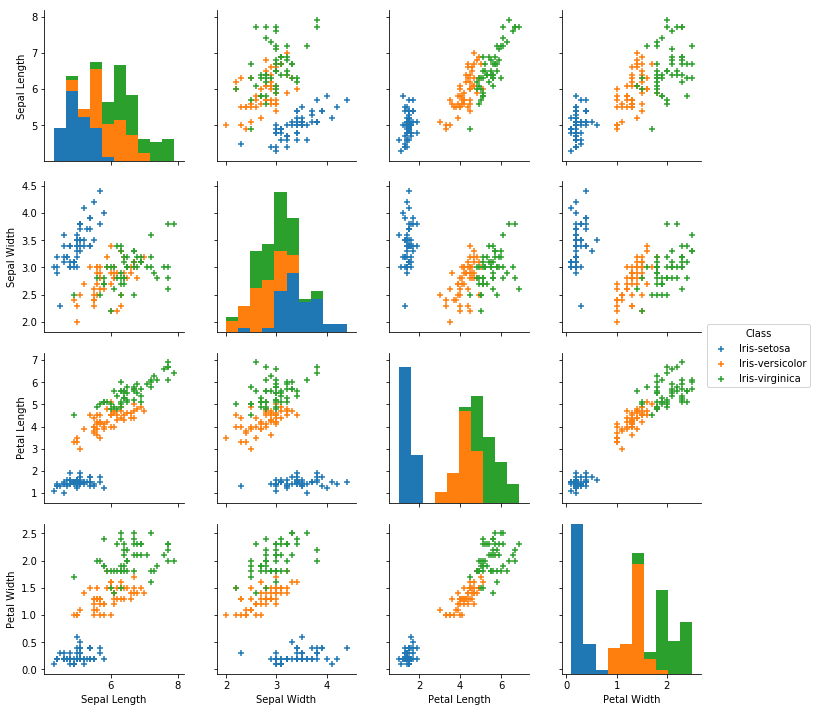

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# this is the scatter plot as well as histogram in seaborn library
# Very useful to explore relationsips between variables in the early stages

g = sns.pairplot(df, hue='Class', markers='+')
plt.show()

In [24]:
def violin_plot_iris(feature):
    sns.violinplot(y='Class', x=feature, data=df, inner='quartile')
    plt.show()

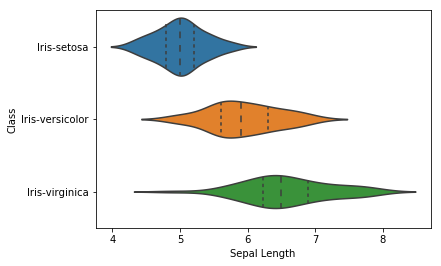

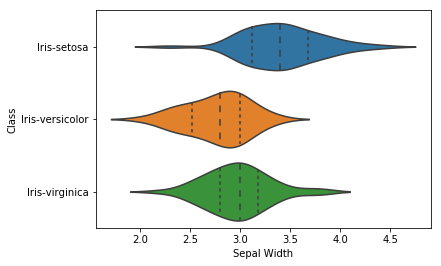

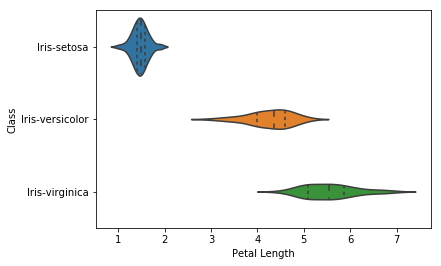

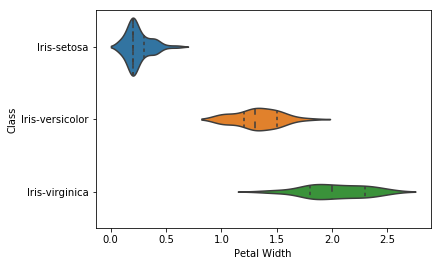

In [25]:
for x in df.columns[:-1]:
    violin_plot_iris(x)

As expected from looking at the stats, Setosa separates itself from the other 2 with its tiny petal length and width

In [27]:
# by checking out the official website we learn that there are some models can be used
# http://scikit-learn.org/stable/supervised_learning.html#supervised-learning

from sklearn import metrics # getting metrics for evaluation
from sklearn.linear_model import LogisticRegression # using linear model
from sklearn.neighbors import KNeighborsClassifier # using KNN algorithm
from sklearn.model_selection import train_test_split # training and testing splite


In [28]:
X = df.drop('Class', axis=1)

In [29]:
y = df.Class

In [30]:
X.head()

,Sepal Length,Sepal Width,Petal Length,Petal Width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [31]:
y.describe()

count                 150
unique                  3
top       Iris-versicolor
freq                   50
Name: Class, dtype: object

Test/Train split to test models

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=5)

In [48]:
X_test.shape

(60, 4)

##### K-nearest Neighbours Algorithm - simple algorithm that assigns classes based on their k nearest neighbors

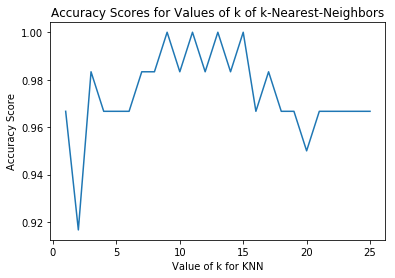

In [49]:
# experimenting with different n values
k_range = [ x for x in range(1,26)]
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))
    
plt.plot(k_range, scores)
plt.xlabel('Value of k for KNN')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for Values of k of k-Nearest-Neighbors')
plt.show()

In [59]:
# using KNN algorithm to make classification

modelknn = KNeighborsClassifier(n_neighbors=11)
modelknn = modelknn.fit(X_train,y_train)

y_pred2 = modelknn.predict(X_test)

In [60]:
print(metrics.accuracy_score(y_test, y_pred2))

1.0


In [61]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred2, labels = y.unique())  # a more easier way

array([[20,  0,  0],
       [ 0, 21,  0],
       [ 0,  0, 19]], dtype=int64)

##### Logistic Regression model as comparison:

In [50]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print(metrics.accuracy_score(y_test,y_pred))

0.9333333333333333


In [55]:
# can use the metrics method in sklearn to learn more about the accuracy
# http://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred, labels = y.unique())  # a more easier way

array([[20,  0,  0],
       [ 0, 17,  4],
       [ 0,  0, 19]], dtype=int64)

See how the models do compared to each other

In [63]:
df['logit_pred'] = logreg.predict(X)
df['knn_pred'] = modelknn.predict(X)

In [65]:
df[df.logit_pred != df.knn_pred]

,Sepal Length,Sepal Width,Petal Length,Petal Width,Class,logit_pred,knn_pred
56,6.3,3.3,4.7,1.6,Iris-versicolor,Iris-virginica,Iris-versicolor
59,5.2,2.7,3.9,1.4,Iris-versicolor,Iris-virginica,Iris-versicolor
66,5.6,3.0,4.5,1.5,Iris-versicolor,Iris-virginica,Iris-versicolor
70,5.9,3.2,4.8,1.8,Iris-versicolor,Iris-virginica,Iris-versicolor
84,5.4,3.0,4.5,1.5,Iris-versicolor,Iris-virginica,Iris-versicolor
85,6.0,3.4,4.5,1.6,Iris-versicolor,Iris-virginica,Iris-versicolor
106,4.9,2.5,4.5,1.7,Iris-virginica,Iris-virginica,Iris-versicolor
119,6.0,2.2,5.0,1.5,Iris-virginica,Iris-virginica,Iris-versicolor
129,7.2,3.0,5.8,1.6,Iris-virginica,Iris-versicolor,Iris-virginica
